In [5]:
import pandas as pd
import numpy as np
from sklearn.model_selection import KFold, cross_val_score
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
import matplotlib.pyplot as plt

In [6]:
df = pd.read_csv("Houses.csv")

# Drop rows with missing target values
df = df.dropna(subset=["Price"])


In [7]:
df = pd.get_dummies(df, columns=['Location'], drop_first=True)

X = df.drop(columns=['Price'])
y = df['Price']

model = LinearRegression()
kf = KFold(n_splits=5, shuffle=True, random_state=42)

In [8]:
# Evaluate with Cross-Validation

r2_scores = cross_val_score(model, X, y, cv=kf, scoring='r2')
mse_scores = -cross_val_score(model, X, y, cv=kf, scoring='neg_mean_squared_error')
mae_scores = -cross_val_score(model, X, y, cv=kf, scoring='neg_mean_absolute_error')
rmse_scores = np.sqrt(mse_scores)

In [11]:
# Train final model on full dataset
model.fit(X, y)
y_pred = model.predict(X)

print("\n===== Final Model (Full Data) =====")
print(f"R² Score:  {r2_score(y, y_pred):.4f}")
print(f"MSE:       {mean_squared_error(y, y_pred):.2f}")
print(f"RMSE:      {np.sqrt(mean_squared_error(y, y_pred)):.2f}")
print(f"MAE:       {mean_absolute_error(y, y_pred):.2f}")


===== Final Model (Full Data) =====
R² Score:  0.9355
MSE:       6439128947292.67
RMSE:      2537543.88
MAE:       2048638.84


In [12]:

print("===== Cross Validation Results (5-Fold) =====")
print(f"R² per fold:   {np.round(r2_scores, 4)}")
print(f"MSE per fold:  {np.round(mse_scores, 2)}")
print(f"RMSE per fold: {np.round(rmse_scores, 2)}")
print(f"MAE per fold:  {np.round(mae_scores, 2)}")

print("\n===== Average Metrics =====")
print(f"Average R²:   {r2_scores.mean():.4f}")
print(f"Average MSE:  {mse_scores.mean():.2f}")
print(f"Average RMSE: {rmse_scores.mean():.2f}")
print(f"Average MAE:  {mae_scores.mean():.2f}")

===== Cross Validation Results (5-Fold) =====
R² per fold:   [0.9397 0.9263 0.9344 0.9431 0.9271]
MSE per fold:  [6.14662566e+12 6.53845087e+12 6.63787026e+12 6.03067497e+12
 7.31122115e+12]
RMSE per fold: [2479238.93 2557039.47 2576406.46 2455743.26 2703926.99]
MAE per fold:  [2013236.78 2067358.84 2085492.93 1966888.6  2182493.91]

===== Average Metrics =====
Average R²:   0.9341
Average MSE:  6532968583163.59
Average RMSE: 2554471.02
Average MAE:  2063094.21


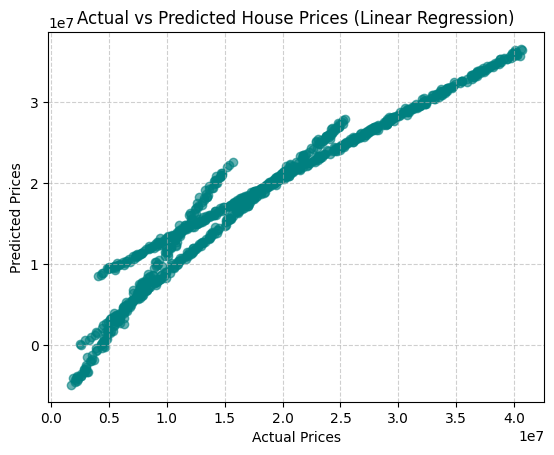

In [13]:
#Visualization: Actual vs Predicted
plt.scatter(y, y_pred, alpha=0.6, color='teal')
plt.xlabel("Actual Prices")
plt.ylabel("Predicted Prices")
plt.title("Actual vs Predicted House Prices (Linear Regression)")
plt.grid(True, linestyle="--", alpha=0.6)
plt.show()
